<a href="https://colab.research.google.com/github/Ana91119/ML_first_project/blob/main/Suarez_Ana_Introduction_to_RS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aim of the day: Build a NETFLIX like recommender (2015 Edition)

- ## Demographic Recommendation
Based on the popularity of the movies.


- ## Genre-based Demographic (i.e. the row|| in NETFLIX.)
This approach will rank a subset of movies, e.g. comedy genre, based on a movie ranker. E.g. popularity, similarity.

- ## Because you watched
This approach will reccomend movies that are similar to those that a user has previously seen.

- Collaborative filtering
User-Based vs Item-Based Collaborative Filtering


- ## Trending Now (Exercise)
In this setting, movies are ranked based on their similarity to an event, e.g. a hurricanes, or christmas.

- ## Custom

Source: https://dl.acm.org/doi/pdf/10.1145/2843948



# Libraries and Data

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
from IPython.display import display, Markdown
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import json
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

drive.mount('/content/drive')

# Downloading the Data
!gdown --id 1-wfPR4VkFluf5DTREgPalfoV8bV3naWV
!gdown --id 12uA9jMlMFWnQRkAO-a3W9aXPudI37OuA
!gdown --id 1HiANp9YTxVD297WYqpQ8Pz5UP8OzO8az
!gdown --id 1LqnTFlFemCCtxQUHtcoA5BBrGqQ4qnl8
!gdown --id 1PXIkGnbk6-tyrdBr_J1nfno1napt9E54
!gdown --id 1uE0w5xHfjN4qhpDI0h_uo66Asao5Df2J

credits = pd.read_csv('credits.csv', dtype=str, delimiter=',')
keywords = pd.read_csv('keywords.csv', dtype=str)
links_small = pd.read_csv('links_small.csv', dtype=str)
movies = pd.read_csv('movies_metadata.csv', dtype=str,  delimiter=',')
ratings_small = pd.read_csv('ratings_small.csv', dtype=str)

display(credits.head(5))
display(keywords.head(5))
display(links_small.head(5))
display(movies.head(5))
display(ratings_small.head(5))

Mounted at /content/drive
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1-wfPR4VkFluf5DTREgPalfoV8bV3naWV
To: /content/credits.csv
100% 190M/190M [00:03<00:00, 55.3MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=12uA9jMlMFWnQRkAO-a3W9aXPudI37OuA
To: /content/links.csv
100% 989k/989k [00:00<00:00, 107MB/s]
/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."
3,31357,"[{'id': 818, 'name': 'based on novel'}, {'id':..."
4,11862,"[{'id': 1009, 'name': 'baby'}, {'id': 1599, 'n..."


,movieId,imdbId,tmdbId
0,1,0114709,862
1,2,0113497,8844
2,3,0113228,15602
3,4,0114885,31357
4,5,0113041,11862


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173


,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


## Dataframes:

### Credits Dataset

| Column | Description                  |
| ------ | ---------------------------- |
| cast   | Information about the cast   |
| crew   | Information about the crew   |
| id     | Unique identifier for movies |

### Keywords Dataset

| Column   | Description              |
| -------- | ------------------------ |
| id       | Unique movie identifier  |
| keywords | Keywords associated with |


### Links_small Dataset

| Column  | Description                        |
| ------- | ---------------------------------- |
| movieId | Movie identifier in the dataset    |
| imdbId  | IMDb identifier for the movie      |
| tmdbId  | TMDb (The Movie Database) identifier |

### Movies Dataset

| Column                 | Description                                          |
| ---------------------- | ---------------------------------------------------- |
| adult                  | Indicator if the movie is for adults                 |
| belongs_to_collection  | Information about the collection the movie belongs to|
| budget                 | Budget of the movie                                  |
| genres                 | Genres of the movie                                  |
| homepage               | Website of the movie                                 |
| id                     | Unique identifier for the movie                      |
| imdb_id                | IMDb identifier for the movie                        |
| original_language      | Original language of the movie                       |
| original_title         | Original title of the movie                          |
| overview               | Brief summary of the movie                           |
| popularity             | Popularity score of the movie                        |
| poster_path            | Path for the movie's poster image                    |
| production_companies   | Companies involved in producing the movie            |
| production_countries   | Countries where the movie was produced               |
| release_date           | Release date of the movie                            |
| revenue                | Revenue generated by the movie                       |
| runtime                | Runtime of the movie                                 |
| spoken_languages       | Languages spoken in the movie                        |
| status                 | Status of the movie's release                        |
| tagline                | Tagline of the movie                                 |
| title                  | Title of the movie                                   |
| video                  | Indicator if a video is available                    |
| vote_average           | Average vote score                                   |
| vote_count             | Count of votes received                              |

  

### Ratings_small Dataset

| Column    | Description                     |
| --------- | ------------------------------- |
| userId    | User identifier                 |
| movieId   | Movie identifier                |
| rating    | Rating given by the user        |
| timestamp | Time when the rating was given  |



### Problem? Inconsistency in the IDs

In [2]:
credits.rename(columns={'id': 'movieId'}, inplace=True)
keywords.rename(columns={'id': 'movieId'}, inplace=True)
movies.rename(columns={'id': 'movieId'}, inplace=True)

# Convert 'budget' to numeric, setting errors='coerce' will replace non-numeric values with NaN
movies['budget'] = pd.to_numeric(movies['budget'], errors='coerce')
# Now you can decide what to do with NaN values. For example, you can fill them with 0:
movies['budget'] = movies['budget'].fillna(1000).astype(int)


movies = movies.fillna(0.0)
movies['vote_count'] = movies['vote_count'].astype(int)
movies['budget'] = movies['budget'].astype(int)
movies['revenue'] = movies['revenue'].astype(int)
movies['vote_average'] = movies['vote_average'].astype(float)
ratings_small['rating'] = ratings_small['rating'].astype(float)
ratings_small['userId'] = ratings_small['userId'].astype(str)
ratings_small['movieId'] = ratings_small['movieId'].astype(str)

# Demographic Filtering and Recommendation based on Movie Attirbutes (Non-Personalized)

We would like to recommend movies based:

1. The budget.
2. The IMDb's Weighted Average Formula.
$$
WR = \left( \frac{v}{v + m} \right) \cdot R + \left( \frac{m}{v + m} \right) \cdot C
$$
  Where:
  - \( WR \) is the weighted rating.
  - \( v \) represents the number of votes for the movie.
  - \( m \) is the minimum number of votes required for the movie to be listed (a threshold you can set based on your dataset).
  - \( R \) is the average rating of the movie.
  - \( C \) is the mean vote across the whole dataset.


3. A custom function that considers the revenue, budget and popularity.

4. EXERCISE ⏰Do you own weighting function.
- write down what values you think are important
- write down how they affect the recommendation +-
- We will make the final formula together.


In [6]:
demographics = movies[['title','vote_count','vote_average','budget','movieId','revenue']]

def score_by_budget(df):
    # Normalize the budget values to a 0-1 range
    max_budget = df['budget'].max()
    df['budget_score'] = df['budget'] / max_budget
    return df

def weighted_rating(df, m):
    # Create a copy of the dataframe to avoid SettingWithCopyWarning
    df_copy = df.copy()

    # Calculation based on the IMDb formula
    V = df_copy['vote_count']
    R = df_copy['vote_average']
    C = df_copy['vote_average'].mean()

    #df_copy['popularity_score'] = #WRITE THE FORMULA
    #return df_copy


def revenue_popularity_score(df):
    # Avoid division by zero in budget
    df['budget'] = df['budget'].replace(0, 1)
    # Calculate revenue to budget ratio
    df['revenue_ratio'] = df['revenue'] / df['budget']
    # Normalize the revenue_ratio and popularity
    max_revenue_ratio = df['revenue_ratio'].max()
    max_popularity = df['popularity_score'].max()
    df['revenue_ratio_normalized'] = df['revenue_ratio'] / max_revenue_ratio
    df['popularity_normalized'] = df['popularity_score'] / max_popularity
    # Final score is an average of normalized revenue ratio and popularity
    df['revenue_popularity_score'] = (df['revenue_ratio_normalized'] + df['popularity_normalized']) / 2

    # Drop the intermediate columns
    columns_to_drop = ['revenue_ratio', 'revenue_ratio_normalized', 'popularity_normalized']
    df.drop(columns=columns_to_drop, inplace=True)

    return df


# Usage example
demographics = score_by_budget(demographics)
demographics = weighted_rating(demographics, 10)
demographics = revenue_popularity_score(demographics)

<ipython-input-6-07114d4383eb>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['budget_score'] = df['budget'] / max_budget


TypeError: ignored

In [ ]:
# information about the collection a movie belongs to (clustering??)



def vote_count_popularity_score(df):
    # Normalize the vote_count values to a 0-1 range
    max_vote_count = df['vote_count'].max()
    df['vote_count_normalized'] = df['vote_count'] / max_vote_count

    # Normalize the popularity score
    max_popularity_score = df['popularity_score'].max()
    df['popularity_normalized'] = df['popularity_score'] / max_popularity_score

    # Final score is a count of normalized vote_count and popularity score
    df['vote_count_popularity_score'] = (df['vote_count_normalized'] + df['popularity_normalized']) / 2

    # Drop the intermediate columns
    columns_to_drop = ['vote_count_normalized', 'popularity_normalized']
    df.drop(columns=columns_to_drop, inplace=True)

    return df


## Plotting the distribution of various columns

You can analyze the dataset

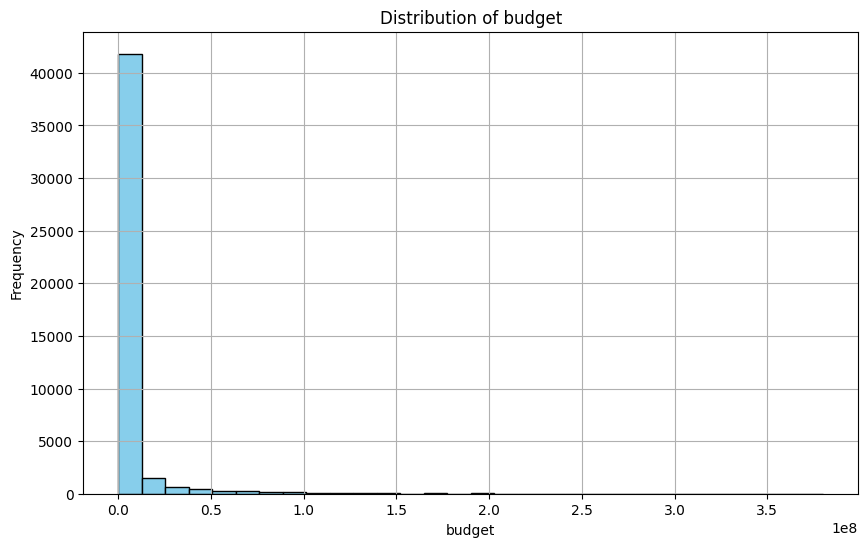

                                             title     budget
17124  Pirates of the Caribbean: On Stranger Tides  380000000
11827     Pirates of the Caribbean: At World's End  300000000
26558                      Avengers: Age of Ultron  280000000
11067                             Superman Returns  270000000
18685                                  John Carter  260000000
16130                                      Tangled  260000000
44842                Transformers: The Last Knight  260000000
11780                                 Spider-Man 3  258000000
21175                              The Lone Ranger  255000000
26567                   Captain America: Civil War  250000000


In [ ]:
column = demographics.budget
plt.figure(figsize=(10, 6))
plt.hist(column, bins=30, color='skyblue', edgecolor='black')
plt.title(f'Distribution of {column.name}')
plt.xlabel(f'{column.name}')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Sort the DataFrame based on 'vote_count' and display the top 10 movies
top_10_movies_by_votes = demographics.sort_values(by=f'{column.name}', ascending=False).head(10)
print(top_10_movies_by_votes[['title', f'{column.name}']])

## QUESTIONS:

1. Explain the Codes
2. Filter the movies by gerne or language e.g. comedy.
  0. A function to process the data is given.
  1. Create a small dataset that contais a movies: genre, id, title, and any other measure you would like to include.
  2. Create a filtering and weighting function, that recommends the top 20 movies that are only commedies.
  3. You can add the weights we calculated before and change the recommendation order.

In [ ]:
# 'movies' is the DataFrame and 'genres' is the column with the JSON strings
# The function extracts genre names from the JSON string
def extract_genre_names(genre_json):
    try:
        # Load the JSON string into a list of dictionaries
        genre_list = json.loads(genre_json.replace('\'', '\"'))
        # Extract the genre names and return them as a list
        return [genre['name'] for genre in genre_list]
    except json.JSONDecodeError:
        # In case of JSON decoding error, return an empty list
        return []

# Apply the function to the 'genres' column to create a new 'genre_names' column
movies['genre_names'] = movies['genres'].apply(extract_genre_names)

In [ ]:
filtering_demo = movies[['title','vote_count','vote_average','budget','movieId','revenue','genre_names']]

def recommend_top_movies_by_genre(dataframe, genre):
    # Filter movies by genre
    genre_filtered = dataframe[dataframe['genre_names'].apply(lambda genres: genre in genres)]

    # Add a column for the number of genres
    genre_filtered['number_of_genres'] = genre_filtered['genre_names'].apply(len)

    genre_filtered = weighted_rating(genre_filtered, 2)

    # Sort movies by the number of genres (asc) and by another metric (desc), e.g., vote_average or vote_count
    # Movies with only the specified genre will come first, and then they will be sorted by vote count within that group
    top_movies = genre_filtered.sort_values(by=['number_of_genres', 'vote_count', 'popularity_score'], ascending=[True, False, False]).head(50)

    return top_movies

# Usage example
top_movies_single_genre = recommend_top_movies_by_genre(filtering_demo, 'Comedy')

display(top_movies_single_genre[['title','number_of_genres', 'vote_count', 'popularity_score']])

<ipython-input-6-1c7ee5a47914>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  genre_filtered['number_of_genres'] = genre_filtered['genre_names'].apply(len)


,title,number_of_genres,vote_count,popularity_score
13746,The Hangover,1,6324,7.199531
17136,The Hangover Part II,1,3836,6.199748
20968,The Hangover Part III,1,2991,5.999810
23309,Neighbors,1,2773,6.199651
30690,Ted 2,1,2524,6.199617
7284,Mean Girls,1,2401,6.899014
15814,Easy A,1,2282,6.699138
11985,Superbad,1,2152,6.998808
32117,The Intern,1,1926,7.098564
227,Dumb and Dumber,1,1894,6.499173


# Because you watched - Personalized Approach

1. Given a user id, e.g. 1
2. Create a dataframe that contains all the movies that a user have rated. (If you want apply a cut-off, e.g. those movies rated by the user >=3)
3. Based on these movies, suggest the user 20 movies that he might like. How?
  - Content-based Recommendation
    - Tf-idf representation of the movies' overview, original_title	columns.
      - Given all the movies, we need to create the tf-idf representation of all the movie content, then given the movies a user has rated, we need to find the most similar (cosine similarity) to them.

In [ ]:
def create_user_profile(user_id, ratings, movies):
    # Filter ratings based on the user and the cutoff
    user_ratings = ratings[(ratings['userId'] == user_id)]
    # Merge with the movies DataFrame to get the movie details
    user_movies = user_ratings.merge(movies, on=['movieId'], how='inner')
    movie_titles = ', '.join(user_movies['title'].values)
    display(f'User {user_id} has rated these movies: {movie_titles}')
    return user_movies


def recommend_movies(user_profile, tfidf, tfidf_matrix, movies, n_recommendations=20):
    # Process the user profile
    user_profile['text'] = user_profile['original_title'] + " " + user_profile['overview']
    user_tfidf = tfidf.transform(user_profile['text'])

    # Compute cosine similarity
    cosine_sim = cosine_similarity(user_tfidf, tfidf_matrix)

    # Get similarity scores for each movie
    similarity_scores = cosine_sim.mean(axis=0)

    # Create a DataFrame of similarity scores
    movie_scores = pd.DataFrame(similarity_scores, columns=['score'], index=movies['movieId'])
    movie_scores = movie_scores.sort_values(by='score', ascending=False)

    # Merge with the movies DataFrame to get movie titles
    recommendations_with_titles = movie_scores.merge(movies[['movieId', 'title']], on='movieId')

    # Exclude movies that the user has already rated
    rated_movie_ids = user_profile['movieId'].unique()
    recommendations_filtered = recommendations_with_titles[~recommendations_with_titles['movieId'].isin(rated_movie_ids)]

    # Return top N recommendations
    return recommendations_filtered.head(n_recommendations)


#OFFLINE CALCULATIONS
movies['text'] = movies['original_title'].astype(str) + " " + movies['overview'].astype(str)
# Create TF-IDF model
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(movies['text'])


# Example usage
user_id = '10'
user_profile = create_user_profile(user_id, ratings_small, movies)
recommended_movies = recommend_movies(user_profile, tfidf, tfidf_matrix,movies)
display(recommended_movies)

'User 10 has rated these movies: Star Trek: The Motion Picture, The Million Dollar Hotel, Bang, Boom, Bang, Eyes Wide Shut, The Conversation, Point Break, Princesses, A Brief History of Time, Teenage Mutant Ninja Turtles III, The Miracle of Bern, Hostel, The Soft Skin, Marie Antoinette, Twin Peaks: Fire Walk with Me, The Breakfast Club, Spanglish, A Very Long Engagement, André Hazes, Zij Gelooft in Mij, The Addams Family, The Three Musketeers, Dr. Jekyll and Mr. Hyde'

,movieId,score,title
21,3016,0.033868,Dr. Jekyll and Mr. Hyde
22,1498,0.031379,Teenage Mutant Ninja Turtles
23,3024,0.029123,The Strange Case of Dr. Jekyll and Mr. Hyde
24,3022,0.028806,Dr. Jekyll and Mr. Hyde
25,110603,0.028774,The Three Musketeers
26,79761,0.028572,The Iron Mask
27,82731,0.028433,The Three Musketeers
28,117026,0.028246,Daughter of Dr. Jekyll
29,41609,0.027058,The Three Musketeers
30,98566,0.025885,Teenage Mutant Ninja Turtles


# Collaborative Filtering

User based filtering- These systems recommend products to a user that similar users have liked.

1. We will create the user-item matrix.

Remember the scalability and sparsity issues of this matrix.

In [ ]:
display(ratings_small.head(5))
print('User-movie pairs:',len(ratings_small))
print('Unique Users:', len(ratings_small.userId.unique()))
print('Unique movies:', len(ratings_small.movieId.unique()))

user_item_matrix = ratings_small.pivot(index='userId', columns='movieId', values='rating')
user_item_matrix_filled = user_item_matrix.fillna(0)
# Display the sorted user-item matrix
display(user_item_matrix_filled)

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


User-movie pairs: 100004
Unique Users: 671
Unique movies: 9066


movieId,1,10,100,100017,100032,100034,100083,100106,100159,100163,...,99795,998,99811,99813,99839,99846,999,99912,99917,99992
userId,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0
96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## User-based collaborative filtering

User-based: For a user U, with a set of similar users determined based on rating vectors consisting of given item ratings, the rating for an item I, which hasn’t been rated, is found by picking out N users from the similarity list who have rated the item I and calculating the rating based on these N ratings.

In user-based collaborative filtering, the recommendation for a user is based on similarities with other users. A general approach:

- Compute Similarities: Calculate the similarity between all pairs of users.
- Commonly used similarity measures are cosine similarity and Pearson correlation.
- Find Similar Users: For each user, find other users who are most similar to them.
- Predict Ratings: Predict a user's rating for an unrated item based on the weighted average of ratings for that item by users who are most similar to the target user.
- Recommend Items: Recommend items with the highest predicted ratings.




In [ ]:
def get_user_rated_movies(user_id, ratings, movies):
    user_ratings = ratings[ratings['userId'] == user_id]
    rated_movies = user_ratings.merge(movies, on='movieId')
    return rated_movies[['title', 'rating', 'movieId']]

In [ ]:
# Compute cosine similarity between users based on their ratings
# This matrix shows how similar each user's ratings are to every other user
user_similarity = cosine_similarity(user_item_matrix_filled)
user_similarity_df = pd.DataFrame(user_similarity, index=user_item_matrix_filled.index, columns=user_item_matrix_filled.index)

def user_based_recommendations(user_id, user_similarity_df, user_item_matrix, movies, n_recommendations=5):
    # Get similarity scores for the target user with all users
    user_similarities = user_similarity_df.loc[str(user_id)]

    # Remove the target user's own similarity score to avoid self-recommendation
    user_similarities = user_similarities.drop(index=str(user_id))

    # Identify similar users based on similarity scores - Put a cutoff
    similar_users = user_similarities.sort_values(ascending=False).index.values[:25]

    # Debugging: Display similar users
    print(f"Similar users for User {user_id}:")
    display(similar_users)

    # Aggregate ratings of similar users
    similar_users_ratings = user_item_matrix.loc[similar_users]

    # Debugging: Display similar users' ratings
    print(f"Ratings of similar users for User {user_id}:")

    # Calculate recommended movies:
    # 1. Apply a lambda function to filter out non-rated movies (ratings > 0) for each similar user.
    # 2. Calculate the mean (average) rating for each movie across similar users.
    # 3. Sort movies by their average ratings in descending order (highest to lowest).
    # 4. Select the top 'n_recommendations' movies as recommendations for the user.
    # Calculate recommended movies step by step:

    # Step 1: Filter out non-rated movies (ratings >= -1.0) for each similar user
    filtered_ratings = similar_users_ratings.apply(lambda row: row[row >= -1.0])

    # Debugging: Display filtered ratings for each similar user
    print("Filtered Ratings for Similar Users:")
    display(filtered_ratings)

    # Step 2: Calculate the mean (average) rating for each movie across similar users
    average_ratings_per_movie = filtered_ratings.mean()

    # Debugging: Display average ratings for each movie
    print("Average Ratings per Movie:")
    display(average_ratings_per_movie)

    # Step 3: Sort movies by their average ratings in descending order (highest to lowest)
    sorted_movies = average_ratings_per_movie.sort_values(ascending=False)

    # Debugging: Display sorted movies by average ratings
    print("Sorted Movies by Average Ratings:")
    display(sorted_movies)

    # Step 4: Select the top 'n_recommendations' movies as recommendations for the user
    recommended_movies = sorted_movies.head(n_recommendations)

    # Debugging: Display recommended movies
    print("Recommended Movies:")
    display(recommended_movies)

    recommended_movie_ids = recommended_movies.index.tolist()

    # Ensure movie IDs in 'movies' DataFrame match the format in the user-item matrix
    movies['movieId'] = movies['movieId'].astype(str)

    # Retrieve titles of recommended movies
    existing_movie_ids = movies['movieId'].isin(map(str, recommended_movie_ids))
    recommended_movie_titles = movies[existing_movie_ids][['movieId', 'title']]

    # Debugging: Display recommended movies and their titles
    print(f"Recommended movies for User {user_id}:")

    return recommended_movie_titles


user_id = '10'  # Example user ID

# Get recommendations for the user
recommendations_for_user = user_based_recommendations(user_id, user_similarity_df, user_item_matrix_filled, movies)

# Retrieve the movies rated by the user
rated_movies = get_user_rated_movies(user_id, ratings_small, movies)

# Display the rated and recommended movies
print(f"Rated movies by User {user_id}:")
display(rated_movies)

print(f"Recommended movies for User {user_id}:")
display(recommendations_for_user)

Similar users for User 10:


array(['271', '155', '206', '562', '550', '523', '101', '443', '651',
       '360', '228', '458', '119', '448', '671', '57', '643', '527',
       '291', '42', '7', '350', '607', '214', '622'], dtype=object)

Ratings of similar users for User 10:
Filtered Ratings for Similar Users:


movieId,1,10,100,100017,100032,100034,100083,100106,100159,100163,...,99795,998,99811,99813,99839,99846,999,99912,99917,99992
userId,,,,,,,,,,,,,,,,,,,,,
271,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
206,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
562,4.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
550,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
443,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
651,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Average Ratings per Movie:


movieId
1         1.18
10        0.70
100       0.00
100017    0.00
100032    0.00
          ... 
99846     0.00
999       0.00
99912     0.00
99917     0.00
99992     0.00
Length: 9066, dtype: float64

Sorted Movies by Average Ratings:


movieId
1198     4.32
1196     4.14
2571     3.80
260      3.76
1291     3.56
         ... 
3377     0.00
33760    0.00
33750    0.00
3371     0.00
99992    0.00
Length: 9066, dtype: float64

Recommended Movies:


movieId
1198    4.32
1196    4.14
2571    3.80
260     3.76
1291    3.56
dtype: float64

Recommended movies for User 10:
Rated movies by User 10:


,title,rating,movieId
0,Star Trek: The Motion Picture,4.0,152
1,The Million Dollar Hotel,4.0,318
2,"Bang, Boom, Bang",3.0,344
3,Eyes Wide Shut,4.0,345
4,The Conversation,3.0,592
5,Point Break,3.0,1089
6,Princesses,4.0,1127
7,A Brief History of Time,5.0,1358
8,Teenage Mutant Ninja Turtles III,3.0,1499
9,The Miracle of Bern,5.0,1611


Recommended movies for User 10:


,movieId,title
938,260,The 39 Steps


## Item-based collaborative filtering

Item-based: For an item I, with a set of similar items determined based on rating vectors consisting of received user ratings, the rating by a user U, who hasn’t rated it, is found by picking out N items from the similarity list that have been rated by U and calculating the rating based on these N ratings.

In item-based collaborative filtering, the recommendation for a user is based on the items that are similar to the items the user has rated. A general approach:

- Compute Similarities: Calculate the similarity between all pairs of items.

- Find Similar Items: For each item, find other items that are most similar to it.

- Predict Ratings: Predict a user's rating for an unrated item based on their ratings for similar items.

- Recommend Items: Recommend items with the highest predicted ratings to the user.



In [ ]:
# Compute cosine similarity between items based on user ratings
item_similarity = cosine_similarity(user_item_matrix_filled.T)
item_similarity_df = pd.DataFrame(item_similarity, index=user_item_matrix_filled.columns, columns=user_item_matrix_filled.columns)

def item_based_recommendations(user_id, item_similarity_df, user_item_matrix, movies, n_recommendations=5):
    # Get the user's ratings
    user_ratings = user_item_matrix.loc[str(user_id)]

    # Identify the items (movies) the user has not rated
    unrated_items = user_ratings[user_ratings == 0].index

    # Calculate predicted ratings for unrated items based on item similarity
    predicted_ratings = item_similarity_df.loc[unrated_items].dot(user_ratings)
    display(predicted_ratings)

    # Sort items by predicted ratings in descending order
    recommended_items = predicted_ratings.sort_values(ascending=False).head(n_recommendations)

    # Retrieve the titles of recommended movies
    recommended_movie_titles = movies[movies['movieId'].isin(recommended_items.index)][['movieId', 'title']]

    # Debugging: Display recommended movies and their titles
    print(f"Recommended movies for User {user_id}:")

    return recommended_movie_titles

user_id = '10'  # Example user ID

# Get recommendations for the user
recommendations_for_user = item_based_recommendations(user_id, item_similarity_df, user_item_matrix_filled, movies)

# Retrieve the movies rated by the user
rated_movies = get_user_rated_movies(user_id, ratings_small, movies)

# Display the rated and recommended movies
print(f"Rated movies by User {user_id}:")
display(rated_movies)

print(f"Recommended movies for User {user_id}:")
display(recommendations_for_user)

movieId
1         47.123232
10        32.746039
100       15.702725
100017     0.538177
100032    10.156085
            ...    
99846      7.655942
999       14.491798
99912      1.125914
99917      3.819076
99992      7.655942
Length: 9020, dtype: float64

Recommended movies for User 10:
Rated movies by User 10:


,title,rating,movieId
0,Star Trek: The Motion Picture,4.0,152
1,The Million Dollar Hotel,4.0,318
2,"Bang, Boom, Bang",3.0,344
3,Eyes Wide Shut,4.0,345
4,The Conversation,3.0,592
5,Point Break,3.0,1089
6,Princesses,4.0,1127
7,A Brief History of Time,5.0,1358
8,Teenage Mutant Ninja Turtles III,3.0,1499
9,The Miracle of Bern,5.0,1611


Recommended movies for User 10:


,movieId,title
938,260,The 39 Steps
13587,1387,Superstar: The Karen Carpenter Story


# Trending Now: Case study Christmas and Language

In [ ]:
# Define a list of Christmas-related keywords
christmas_keywords = ['christmas', 'xmas', 'santa']

# Filter movies based on Christmas keywords and language
filtered_movies = movies[(movies['original_language'] == 'it') &
                         (movies['original_title'].str.contains('|'.join(christmas_keywords), case=False) |
                          movies['overview'].str.contains('|'.join(christmas_keywords), case=False))]

display(filtered_movies[['title','genre_names','overview']])

,title,genre_names,overview
9926,"Dearest Relatives, Poisonous Relations",[Comedy],"Like every year, everyone is going back to the..."
13651,Flatfoot in Egypt,"[Action, Comedy, Crime, Drama]","Police Commissioner Rizzo, Bigfoot (Piedone by..."
17401,Time Stood Still,"[Documentary, Drama]",Two middle-aged men work as caretakers on an i...
23554,Human Capital,[Drama],The destinies of two families are irrevocably ...
24747,How the Toys Saved Christmas,"[Animation, Family, Foreign]",When Santa's helper La Befana falls ill and mu...
25346,The Devil and Holy Water,[],0.0
26136,The New Godfathers,[Crime],"A revolution in Iran halts a heroin shipment, ..."
28060,Four Gunmen of the Holy Trinity,[Western],Arms trafficking with the Indians on the one h...
30767,Christmas Vacation '91,[Comedy],This coarse bedroom farce takes place at the S...
32065,Brancaleone alle crociate,[Comedy],Brancaleone è di nuovo in viaggio con la sua b...


# Custom Recommender System (Memory Based)

Ideas:


*   Genre & Popularity Filtered Recommender: Suggest movies to a user based on their preferred genre and popularity score.

*  Country & Genre Hybrid Recommender: Suggest movies to a user from the same country as movies they've liked, and filter further based on their preferred genre.





In [ ]:
import pandas as pd

# Function to create a user profile
def create_user_profile(user_id, ratings, movies):
    # Filter ratings based on the user
    user_ratings = ratings[ratings['userId'] == user_id]

    # Merge with the movies DataFrame to get movie details
    user_movies = user_ratings.merge(movies, on=['movieId'], how='inner')

    # Extract preferred genre(s) from user's rated movies (you can customize this)
    preferred_genres = user_movies['genres'].str.split('|').explode().value_counts().index.tolist()

    # Display user's rated movies
    print(f'User {user_id} has rated these movies:')
    display(user_movies[['title', 'genres']])

    return preferred_genres

# Function to recommend movies based on preferred genre and popularity
def recommend_movies(preferred_genres, movies, n_recommendations=10):
    # Filter movies that match the user's preferred genre(s)
    recommended_movies = movies[movies['genres'].str.split('|').explode().isin(preferred_genres)]

    # Sort recommended movies by popularity (you can customize this based on popularity score)
    recommended_movies = recommended_movies.sort_values(by='popularity', ascending=False)

    # Exclude movies that the user has already rated (if needed)
    # user_rated_movie_ids = user_profile['movieId'].unique()
    # recommended_movies = recommended_movies[~recommended_movies['movieId'].isin(user_rated_movie_ids)]

    # Return top N recommendations
    return recommended_movies.head(n_recommendations)

# Example usage
user_id = '10'  # Replace with the desired user ID
preferred_genres = create_user_profile(user_id, ratings_small, movies)
recommended_movies = recommend_movies(preferred_genres, movies)
display(recommended_movies['title'])


User 10 has rated these movies:


,title,genres
0,Star Trek: The Motion Picture,"[{'id': 878, 'name': 'Science Fiction'}, {'id'..."
1,The Million Dollar Hotel,"[{'id': 18, 'name': 'Drama'}, {'id': 53, 'name..."
2,"Bang, Boom, Bang","[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name..."
3,Eyes Wide Shut,"[{'id': 9648, 'name': 'Mystery'}, {'id': 18, '..."
4,The Conversation,"[{'id': 80, 'name': 'Crime'}, {'id': 18, 'name..."
5,Point Break,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam..."
6,Princesses,"[{'id': 18, 'name': 'Drama'}]"
7,A Brief History of Time,"[{'id': 99, 'name': 'Documentary'}]"
8,Teenage Mutant Ninja Turtles III,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam..."
9,The Miracle of Bern,"[{'id': 18, 'name': 'Drama'}, {'id': 35, 'name..."


1360                            Hamlet
12053     4 Months, 3 Weeks and 2 Days
5214                  Hollywood Ending
4294                Cries and Whispers
5414     Down and Out in Beverly Hills
35694                The Devil's Candy
6857                     Lorenzo's Oil
3630                Me, Myself & Irene
20380           The Summer I Turned 15
29778         Christopher and His Kind
Name: title, dtype: object